## Define the Convolutional Neural Network

In this notebook and in `models.py`, we will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. 

---


## CNN Architecture

* Convolutional layers
* Maxpooling layers
* Fully-connected layers

### Define the model in the file `models.py` file
---

In [1]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2020-02-12 22:32:43--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.206.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.206.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  80.4MB/s    in 4.1s    

2020-02-12 22:32:47 (79.7 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_

  inflating: /data/test/Angela_Bassett_31.jpg  
  inflating: /data/test/Angela_Bassett_40.jpg  
  inflating: /data/test/Angela_Bassett_41.jpg  
  inflating: /data/test/Angelo_Reyes_20.jpg  
  inflating: /data/test/Angelo_Reyes_21.jpg  
  inflating: /data/test/Angelo_Reyes_30.jpg  
  inflating: /data/test/Angelo_Reyes_31.jpg  
  inflating: /data/test/Angelo_Reyes_50.jpg  
  inflating: /data/test/Angelo_Reyes_51.jpg  
  inflating: /data/test/Baburam_Bhattari_00.jpg  
  inflating: /data/test/Baburam_Bhattari_01.jpg  
  inflating: /data/test/Baburam_Bhattari_20.jpg  
  inflating: /data/test/Baburam_Bhattari_21.jpg  
  inflating: /data/test/Baburam_Bhattari_30.jpg  
  inflating: /data/test/Baburam_Bhattari_31.jpg  
  inflating: /data/test/Barbara_Bodine_00.jpg  
  inflating: /data/test/Barbara_Bodine_01.jpg  
  inflating: /data/test/Barbara_Bodine_20.jpg  
  inflating: /data/test/Barbara_Bodine_21.jpg  
  inflating: /data/test/Barbara_Bodine_40.jpg  
  inflating: /data/test/Barbara_Bodine_4

  inflating: /data/test/Charlie_Coles_10.jpg  
  inflating: /data/test/Charlie_Coles_11.jpg  
  inflating: /data/test/Charlie_Coles_20.jpg  
  inflating: /data/test/Charlie_Coles_21.jpg  
  inflating: /data/test/Charlize_Theron_10.jpg  
  inflating: /data/test/Charlize_Theron_11.jpg  
  inflating: /data/test/Charlize_Theron_30.jpg  
  inflating: /data/test/Charlize_Theron_31.jpg  
  inflating: /data/test/Charlize_Theron_50.jpg  
  inflating: /data/test/Charlize_Theron_51.jpg  
  inflating: /data/test/Charlotte_Casiraghi_00.jpg  
  inflating: /data/test/Charlotte_Casiraghi_01.jpg  
  inflating: /data/test/Charlotte_Casiraghi_10.jpg  
  inflating: /data/test/Charlotte_Casiraghi_11.jpg  
  inflating: /data/test/Charlotte_Casiraghi_20.jpg  
  inflating: /data/test/Charlotte_Casiraghi_21.jpg  
  inflating: /data/test/Charlotte_Rampling_00.jpg  
  inflating: /data/test/Charlotte_Rampling_01.jpg  
  inflating: /data/test/Charlotte_Rampling_30.jpg  
  inflating: /data/test/Charlotte_Rampling_3

  inflating: /data/test/Dai_Bachtiar_20.jpg  
  inflating: /data/test/Dai_Bachtiar_21.jpg  
  inflating: /data/test/Dai_Bachtiar_50.jpg  
  inflating: /data/test/Dai_Bachtiar_51.jpg  
  inflating: /data/test/Daisy_Fuentes_20.jpg  
  inflating: /data/test/Daisy_Fuentes_21.jpg  
  inflating: /data/test/Daisy_Fuentes_30.jpg  
  inflating: /data/test/Daisy_Fuentes_31.jpg  
  inflating: /data/test/Daisy_Fuentes_40.jpg  
  inflating: /data/test/Daisy_Fuentes_41.jpg  
  inflating: /data/test/Dan_Ackroyd_00.jpg  
  inflating: /data/test/Dan_Ackroyd_01.jpg  
  inflating: /data/test/Dan_Ackroyd_20.jpg  
  inflating: /data/test/Dan_Ackroyd_21.jpg  
  inflating: /data/test/Dan_Ackroyd_30.jpg  
  inflating: /data/test/Dan_Ackroyd_31.jpg  
  inflating: /data/test/Daniel_Radcliffe_00.jpg  
  inflating: /data/test/Daniel_Radcliffe_01.jpg  
  inflating: /data/test/Daniel_Radcliffe_20.jpg  
  inflating: /data/test/Daniel_Radcliffe_21.jpg  
  inflating: /data/test/Daniel_Radcliffe_50.jpg  
  inflating: /

  inflating: /data/test/Emma_Thompson_21.jpg  
  inflating: /data/test/Emma_Thompson_30.jpg  
  inflating: /data/test/Emma_Thompson_31.jpg  
  inflating: /data/test/Emma_Thompson_40.jpg  
  inflating: /data/test/Emma_Thompson_41.jpg  
  inflating: /data/test/Emma_Thompson_50.jpg  
  inflating: /data/test/Emma_Thompson_51.jpg  
  inflating: /data/test/Emmy_Rossum_20.jpg  
  inflating: /data/test/Emmy_Rossum_21.jpg  
  inflating: /data/test/Emmy_Rossum_30.jpg  
  inflating: /data/test/Emmy_Rossum_31.jpg  
  inflating: /data/test/Emmy_Rossum_40.jpg  
  inflating: /data/test/Emmy_Rossum_41.jpg  
  inflating: /data/test/Emmy_Rossum_50.jpg  
  inflating: /data/test/Emmy_Rossum_51.jpg  
  inflating: /data/test/Eric_Benet_00.jpg  
  inflating: /data/test/Eric_Benet_01.jpg  
  inflating: /data/test/Eric_Benet_10.jpg  
  inflating: /data/test/Eric_Benet_11.jpg  
  inflating: /data/test/Eric_Benet_30.jpg  
  inflating: /data/test/Eric_Benet_31.jpg  
  inflating: /data/test/Erin_Hershey_Presley_10

  inflating: /data/test/George_Karl_50.jpg  
  inflating: /data/test/George_Karl_51.jpg  
  inflating: /data/test/GL_Peiris_00.jpg  
  inflating: /data/test/GL_Peiris_01.jpg  
  inflating: /data/test/GL_Peiris_10.jpg  
  inflating: /data/test/GL_Peiris_11.jpg  
  inflating: /data/test/GL_Peiris_30.jpg  
  inflating: /data/test/GL_Peiris_31.jpg  
  inflating: /data/test/Hanan_Ashrawi_10.jpg  
  inflating: /data/test/Hanan_Ashrawi_11.jpg  
  inflating: /data/test/Hanan_Ashrawi_20.jpg  
  inflating: /data/test/Hanan_Ashrawi_21.jpg  
  inflating: /data/test/Hanan_Ashrawi_40.jpg  
  inflating: /data/test/Hanan_Ashrawi_41.jpg  
  inflating: /data/test/Harrison_Ford_10.jpg  
  inflating: /data/test/Harrison_Ford_11.jpg  
  inflating: /data/test/Harrison_Ford_20.jpg  
  inflating: /data/test/Harrison_Ford_21.jpg  
  inflating: /data/test/Harrison_Ford_50.jpg  
  inflating: /data/test/Harrison_Ford_51.jpg  
  inflating: /data/test/Hassan_Nasrallah_30.jpg  
  inflating: /data/test/Hassan_Nasrall

  inflating: /data/test/Keith_Olbermann_21.jpg  
  inflating: /data/test/Keith_Olbermann_50.jpg  
  inflating: /data/test/Keith_Olbermann_51.jpg  
  inflating: /data/test/Keith_Tyson_00.jpg  
  inflating: /data/test/Keith_Tyson_01.jpg  
  inflating: /data/test/Keith_Tyson_10.jpg  
  inflating: /data/test/Keith_Tyson_11.jpg  
  inflating: /data/test/Keith_Tyson_20.jpg  
  inflating: /data/test/Keith_Tyson_21.jpg  
  inflating: /data/test/Kemal_Dervis_00.jpg  
  inflating: /data/test/Kemal_Dervis_01.jpg  
  inflating: /data/test/Kemal_Dervis_10.jpg  
  inflating: /data/test/Kemal_Dervis_11.jpg  
  inflating: /data/test/Kemal_Dervis_30.jpg  
  inflating: /data/test/Kemal_Dervis_31.jpg  
  inflating: /data/test/Kevin_Satterfield_00.jpg  
  inflating: /data/test/Kevin_Satterfield_01.jpg  
  inflating: /data/test/Kevin_Satterfield_10.jpg  
  inflating: /data/test/Kevin_Satterfield_11.jpg  
  inflating: /data/test/Kevin_Satterfield_20.jpg  
  inflating: /data/test/Kevin_Satterfield_21.jpg  
 

  inflating: /data/test/Linda_Franklin_10.jpg  
  inflating: /data/test/Linda_Franklin_11.jpg  
  inflating: /data/test/Linda_Franklin_20.jpg  
  inflating: /data/test/Linda_Franklin_21.jpg  
  inflating: /data/test/Linda_Franklin_40.jpg  
  inflating: /data/test/Linda_Franklin_41.jpg  
  inflating: /data/test/Linda_Sanchez_00.jpg  
  inflating: /data/test/Linda_Sanchez_01.jpg  
  inflating: /data/test/Linda_Sanchez_10.jpg  
  inflating: /data/test/Linda_Sanchez_11.jpg  
  inflating: /data/test/Linda_Sanchez_20.jpg  
  inflating: /data/test/Linda_Sanchez_21.jpg  
  inflating: /data/test/Linda_Sanchez_40.jpg  
  inflating: /data/test/Linda_Sanchez_41.jpg  
  inflating: /data/test/Lindsey_Graham_00.jpg  
  inflating: /data/test/Lindsey_Graham_01.jpg  
  inflating: /data/test/Lindsey_Graham_10.jpg  
  inflating: /data/test/Lindsey_Graham_11.jpg  
  inflating: /data/test/Lindsey_Graham_20.jpg  
  inflating: /data/test/Lindsey_Graham_21.jpg  
  inflating: /data/test/Lindsey_Graham_30.jpg  


  inflating: /data/test/Marieta_Chrousala_10.jpg  
  inflating: /data/test/Marieta_Chrousala_11.jpg  
  inflating: /data/test/Marieta_Chrousala_40.jpg  
  inflating: /data/test/Marieta_Chrousala_41.jpg  
  inflating: /data/test/Marina_Silva_10.jpg  
  inflating: /data/test/Marina_Silva_11.jpg  
  inflating: /data/test/Marina_Silva_20.jpg  
  inflating: /data/test/Marina_Silva_21.jpg  
  inflating: /data/test/Marina_Silva_40.jpg  
  inflating: /data/test/Marina_Silva_41.jpg  
  inflating: /data/test/Marina_Silva_50.jpg  
  inflating: /data/test/Marina_Silva_51.jpg  
  inflating: /data/test/Mario_Kreutzberger_20.jpg  
  inflating: /data/test/Mario_Kreutzberger_21.jpg  
  inflating: /data/test/Mario_Kreutzberger_30.jpg  
  inflating: /data/test/Mario_Kreutzberger_31.jpg  
  inflating: /data/test/Mario_Kreutzberger_40.jpg  
  inflating: /data/test/Mario_Kreutzberger_41.jpg  
  inflating: /data/test/Marisa_Tomei_10.jpg  
  inflating: /data/test/Marisa_Tomei_11.jpg  
  inflating: /data/test/

  inflating: /data/test/Pat_Riley_20.jpg  
  inflating: /data/test/Pat_Riley_21.jpg  
  inflating: /data/test/Pat_Riley_50.jpg  
  inflating: /data/test/Pat_Riley_51.jpg  
  inflating: /data/test/Patrick_Leahy_10.jpg  
  inflating: /data/test/Patrick_Leahy_11.jpg  
  inflating: /data/test/Patrick_Leahy_20.jpg  
  inflating: /data/test/Patrick_Leahy_21.jpg  
  inflating: /data/test/Patrick_Leahy_30.jpg  
  inflating: /data/test/Patrick_Leahy_31.jpg  
  inflating: /data/test/Paul_Otellini_00.jpg  
  inflating: /data/test/Paul_Otellini_01.jpg  
  inflating: /data/test/Paul_Otellini_10.jpg  
  inflating: /data/test/Paul_Otellini_11.jpg  
  inflating: /data/test/Paul_Otellini_20.jpg  
  inflating: /data/test/Paul_Otellini_21.jpg  
  inflating: /data/test/Paul_Reiser_00.jpg  
  inflating: /data/test/Paul_Reiser_01.jpg  
  inflating: /data/test/Paul_Reiser_20.jpg  
  inflating: /data/test/Paul_Reiser_21.jpg  
  inflating: /data/test/Paul_Reiser_30.jpg  
  inflating: /data/test/Paul_Reiser_31.

  inflating: /data/test/Ridley_Scott_20.jpg  
  inflating: /data/test/Ridley_Scott_21.jpg  
  inflating: /data/test/Ridley_Scott_30.jpg  
  inflating: /data/test/Ridley_Scott_31.jpg  
  inflating: /data/test/Robbie_Coltrane_00.jpg  
  inflating: /data/test/Robbie_Coltrane_01.jpg  
  inflating: /data/test/Robbie_Coltrane_10.jpg  
  inflating: /data/test/Robbie_Coltrane_11.jpg  
  inflating: /data/test/Robbie_Coltrane_20.jpg  
  inflating: /data/test/Robbie_Coltrane_21.jpg  
  inflating: /data/test/Robbie_Coltrane_50.jpg  
  inflating: /data/test/Robbie_Coltrane_51.jpg  
  inflating: /data/test/Robert_Altman_10.jpg  
  inflating: /data/test/Robert_Altman_11.jpg  
  inflating: /data/test/Robert_Altman_20.jpg  
  inflating: /data/test/Robert_Altman_21.jpg  
  inflating: /data/test/Robert_Altman_50.jpg  
  inflating: /data/test/Robert_Altman_51.jpg  
  inflating: /data/test/Roberto_Benigni_00.jpg  
  inflating: /data/test/Roberto_Benigni_01.jpg  
  inflating: /data/test/Roberto_Benigni_10.j

  inflating: /data/test/Tom_Sizemore_21.jpg  
  inflating: /data/test/Valerie_Harper_00.jpg  
  inflating: /data/test/Valerie_Harper_01.jpg  
  inflating: /data/test/Valerie_Harper_30.jpg  
  inflating: /data/test/Valerie_Harper_31.jpg  
  inflating: /data/test/Valerie_Harper_40.jpg  
  inflating: /data/test/Valerie_Harper_41.jpg  
  inflating: /data/test/Valerie_Harper_50.jpg  
  inflating: /data/test/Valerie_Harper_51.jpg  
  inflating: /data/test/Vicente_Fox_10.jpg  
  inflating: /data/test/Vicente_Fox_11.jpg  
  inflating: /data/test/Vicente_Fox_20.jpg  
  inflating: /data/test/Vicente_Fox_21.jpg  
  inflating: /data/test/Vicente_Fox_30.jpg  
  inflating: /data/test/Vicente_Fox_31.jpg  
  inflating: /data/test/Vojislav_Seselj_00.jpg  
  inflating: /data/test/Vojislav_Seselj_01.jpg  
  inflating: /data/test/Vojislav_Seselj_20.jpg  
  inflating: /data/test/Vojislav_Seselj_21.jpg  
  inflating: /data/test/Vojislav_Seselj_40.jpg  
  inflating: /data/test/Vojislav_Seselj_41.jpg  
  infl

  inflating: /data/training/Ahmad_Masood_40.jpg  
  inflating: /data/training/Ahmad_Masood_41.jpg  
  inflating: /data/training/Ahmad_Masood_42.jpg  
  inflating: /data/training/Ahmed_Ahmed_00.jpg  
  inflating: /data/training/Ahmed_Ahmed_01.jpg  
  inflating: /data/training/Ahmed_Ahmed_02.jpg  
  inflating: /data/training/Ahmed_Ahmed_10.jpg  
  inflating: /data/training/Ahmed_Ahmed_11.jpg  
  inflating: /data/training/Ahmed_Ahmed_12.jpg  
  inflating: /data/training/Ahmed_Ahmed_40.jpg  
  inflating: /data/training/Ahmed_Ahmed_41.jpg  
  inflating: /data/training/Ahmed_Ahmed_42.jpg  
  inflating: /data/training/Ahmed_Ahmed_50.jpg  
  inflating: /data/training/Ahmed_Ahmed_51.jpg  
  inflating: /data/training/Ahmed_Ahmed_52.jpg  
  inflating: /data/training/Aidan_Quinn_00.jpg  
  inflating: /data/training/Aidan_Quinn_01.jpg  
  inflating: /data/training/Aidan_Quinn_02.jpg  
  inflating: /data/training/Aidan_Quinn_10.jpg  
  inflating: /data/training/Aidan_Quinn_11.jpg  
  inflating: /dat

  inflating: /data/training/Andy_Rooney_21.jpg  
  inflating: /data/training/Andy_Rooney_22.jpg  
  inflating: /data/training/Andy_Rooney_50.jpg  
  inflating: /data/training/Andy_Rooney_51.jpg  
  inflating: /data/training/Andy_Rooney_52.jpg  
  inflating: /data/training/Angel_Lockward_30.jpg  
  inflating: /data/training/Angel_Lockward_31.jpg  
  inflating: /data/training/Angel_Lockward_32.jpg  
  inflating: /data/training/Angel_Lockward_40.jpg  
  inflating: /data/training/Angel_Lockward_41.jpg  
  inflating: /data/training/Angel_Lockward_42.jpg  
  inflating: /data/training/Angel_Lockward_50.jpg  
  inflating: /data/training/Angel_Lockward_51.jpg  
  inflating: /data/training/Angel_Lockward_52.jpg  
  inflating: /data/training/Angela_Bassett_20.jpg  
  inflating: /data/training/Angela_Bassett_21.jpg  
  inflating: /data/training/Angela_Bassett_22.jpg  
  inflating: /data/training/Angela_Bassett_30.jpg  
  inflating: /data/training/Angela_Bassett_31.jpg  
  inflating: /data/training

  inflating: /data/training/Cameron_Diaz_20.jpg  
  inflating: /data/training/Cameron_Diaz_21.jpg  
  inflating: /data/training/Cameron_Diaz_22.jpg  
  inflating: /data/training/Cameron_Diaz_40.jpg  
  inflating: /data/training/Cameron_Diaz_41.jpg  
  inflating: /data/training/Cameron_Diaz_42.jpg  
  inflating: /data/training/Cameron_Diaz_50.jpg  
  inflating: /data/training/Cameron_Diaz_51.jpg  
  inflating: /data/training/Cameron_Diaz_52.jpg  
  inflating: /data/training/Carey_Lowell_00.jpg  
  inflating: /data/training/Carey_Lowell_01.jpg  
  inflating: /data/training/Carey_Lowell_02.jpg  
  inflating: /data/training/Carey_Lowell_20.jpg  
  inflating: /data/training/Carey_Lowell_21.jpg  
  inflating: /data/training/Carey_Lowell_22.jpg  
  inflating: /data/training/Carey_Lowell_30.jpg  
  inflating: /data/training/Carey_Lowell_31.jpg  
  inflating: /data/training/Carey_Lowell_32.jpg  
  inflating: /data/training/Carla_Gugino_10.jpg  
  inflating: /data/training/Carla_Gugino_11.jpg  


  inflating: /data/training/Chita_Rivera_32.jpg  
  inflating: /data/training/Chris_Cirino_20.jpg  
  inflating: /data/training/Chris_Cirino_21.jpg  
  inflating: /data/training/Chris_Cirino_22.jpg  
  inflating: /data/training/Chris_Cirino_30.jpg  
  inflating: /data/training/Chris_Cirino_31.jpg  
  inflating: /data/training/Chris_Cirino_32.jpg  
  inflating: /data/training/Chris_Cirino_50.jpg  
  inflating: /data/training/Chris_Cirino_51.jpg  
  inflating: /data/training/Chris_Cirino_52.jpg  
  inflating: /data/training/Chris_Cooper_00.jpg  
  inflating: /data/training/Chris_Cooper_01.jpg  
  inflating: /data/training/Chris_Cooper_02.jpg  
  inflating: /data/training/Chris_Cooper_30.jpg  
  inflating: /data/training/Chris_Cooper_31.jpg  
  inflating: /data/training/Chris_Cooper_32.jpg  
  inflating: /data/training/Chris_Cooper_40.jpg  
  inflating: /data/training/Chris_Cooper_41.jpg  
  inflating: /data/training/Chris_Cooper_42.jpg  
  inflating: /data/training/Chris_Matthews_00.jpg 

  inflating: /data/training/Conan_OBrien_00.jpg  
  inflating: /data/training/Conan_OBrien_01.jpg  
  inflating: /data/training/Conan_OBrien_02.jpg  
  inflating: /data/training/Conan_OBrien_10.jpg  
  inflating: /data/training/Conan_OBrien_11.jpg  
  inflating: /data/training/Conan_OBrien_12.jpg  
  inflating: /data/training/Conan_OBrien_50.jpg  
  inflating: /data/training/Conan_OBrien_51.jpg  
  inflating: /data/training/Conan_OBrien_52.jpg  
  inflating: /data/training/Condoleezza_Rice_10.jpg  
  inflating: /data/training/Condoleezza_Rice_11.jpg  
  inflating: /data/training/Condoleezza_Rice_12.jpg  
  inflating: /data/training/Condoleezza_Rice_20.jpg  
  inflating: /data/training/Condoleezza_Rice_21.jpg  
  inflating: /data/training/Condoleezza_Rice_22.jpg  
  inflating: /data/training/Condoleezza_Rice_30.jpg  
  inflating: /data/training/Condoleezza_Rice_31.jpg  
  inflating: /data/training/Condoleezza_Rice_32.jpg  
  inflating: /data/training/Condoleezza_Rice_40.jpg  
  inflatin

  inflating: /data/training/Edie_Falco_30.jpg  
  inflating: /data/training/Edie_Falco_31.jpg  
  inflating: /data/training/Edie_Falco_32.jpg  
  inflating: /data/training/Edie_Falco_40.jpg  
  inflating: /data/training/Edie_Falco_41.jpg  
  inflating: /data/training/Edie_Falco_42.jpg  
  inflating: /data/training/Edie_Falco_50.jpg  
  inflating: /data/training/Edie_Falco_51.jpg  
  inflating: /data/training/Edie_Falco_52.jpg  
  inflating: /data/training/Eduardo_Duhalde_00.jpg  
  inflating: /data/training/Eduardo_Duhalde_01.jpg  
  inflating: /data/training/Eduardo_Duhalde_02.jpg  
  inflating: /data/training/Eduardo_Duhalde_10.jpg  
  inflating: /data/training/Eduardo_Duhalde_11.jpg  
  inflating: /data/training/Eduardo_Duhalde_12.jpg  
  inflating: /data/training/Eduardo_Duhalde_30.jpg  
  inflating: /data/training/Eduardo_Duhalde_31.jpg  
  inflating: /data/training/Eduardo_Duhalde_32.jpg  
  inflating: /data/training/Edward_Burns_10.jpg  
  inflating: /data/training/Edward_Burns_

  inflating: /data/training/Emmy_Rossum_40.jpg  
  inflating: /data/training/Emmy_Rossum_41.jpg  
  inflating: /data/training/Emmy_Rossum_42.jpg  
  inflating: /data/training/Emmy_Rossum_50.jpg  
  inflating: /data/training/Emmy_Rossum_51.jpg  
  inflating: /data/training/Emmy_Rossum_52.jpg  
  inflating: /data/training/Eric_Benet_00.jpg  
  inflating: /data/training/Eric_Benet_01.jpg  
  inflating: /data/training/Eric_Benet_02.jpg  
  inflating: /data/training/Eric_Benet_10.jpg  
  inflating: /data/training/Eric_Benet_11.jpg  
  inflating: /data/training/Eric_Benet_12.jpg  
  inflating: /data/training/Eric_Benet_30.jpg  
  inflating: /data/training/Eric_Benet_31.jpg  
  inflating: /data/training/Eric_Benet_32.jpg  
  inflating: /data/training/Erin_Hershey_Presley_10.jpg  
  inflating: /data/training/Erin_Hershey_Presley_11.jpg  
  inflating: /data/training/Erin_Hershey_Presley_12.jpg  
  inflating: /data/training/Erin_Hershey_Presley_30.jpg  
  inflating: /data/training/Erin_Hershey_P

  inflating: /data/training/Franz_Fischler_02.jpg  
  inflating: /data/training/Franz_Fischler_30.jpg  
  inflating: /data/training/Franz_Fischler_31.jpg  
  inflating: /data/training/Franz_Fischler_32.jpg  
  inflating: /data/training/Franz_Fischler_40.jpg  
  inflating: /data/training/Franz_Fischler_41.jpg  
  inflating: /data/training/Franz_Fischler_42.jpg  
  inflating: /data/training/Franz_Fischler_50.jpg  
  inflating: /data/training/Franz_Fischler_51.jpg  
  inflating: /data/training/Franz_Fischler_52.jpg  
  inflating: /data/training/Gabi_Zimmer_00.jpg  
  inflating: /data/training/Gabi_Zimmer_01.jpg  
  inflating: /data/training/Gabi_Zimmer_02.jpg  
  inflating: /data/training/Gabi_Zimmer_10.jpg  
  inflating: /data/training/Gabi_Zimmer_11.jpg  
  inflating: /data/training/Gabi_Zimmer_12.jpg  
  inflating: /data/training/Gabi_Zimmer_20.jpg  
  inflating: /data/training/Gabi_Zimmer_21.jpg  
  inflating: /data/training/Gabi_Zimmer_22.jpg  
  inflating: /data/training/Gabi_Zimmer

  inflating: /data/training/Jafar_Umar_Thalib_02.jpg  
  inflating: /data/training/Jafar_Umar_Thalib_20.jpg  
  inflating: /data/training/Jafar_Umar_Thalib_21.jpg  
  inflating: /data/training/Jafar_Umar_Thalib_22.jpg  
  inflating: /data/training/Jafar_Umar_Thalib_30.jpg  
  inflating: /data/training/Jafar_Umar_Thalib_31.jpg  
  inflating: /data/training/Jafar_Umar_Thalib_32.jpg  
  inflating: /data/training/Jafar_Umar_Thalib_50.jpg  
  inflating: /data/training/Jafar_Umar_Thalib_51.jpg  
  inflating: /data/training/Jafar_Umar_Thalib_52.jpg  
  inflating: /data/training/Jaime_Pressly_00.jpg  
  inflating: /data/training/Jaime_Pressly_01.jpg  
  inflating: /data/training/Jaime_Pressly_02.jpg  
  inflating: /data/training/Jaime_Pressly_10.jpg  
  inflating: /data/training/Jaime_Pressly_11.jpg  
  inflating: /data/training/Jaime_Pressly_12.jpg  
  inflating: /data/training/Jaime_Pressly_40.jpg  
  inflating: /data/training/Jaime_Pressly_41.jpg  
  inflating: /data/training/Jaime_Pressly_

  inflating: /data/training/Katja_Riemann_11.jpg  
  inflating: /data/training/Katja_Riemann_12.jpg  
  inflating: /data/training/Katja_Riemann_20.jpg  
  inflating: /data/training/Katja_Riemann_21.jpg  
  inflating: /data/training/Katja_Riemann_22.jpg  
  inflating: /data/training/Keith_Olbermann_00.jpg  
  inflating: /data/training/Keith_Olbermann_01.jpg  
  inflating: /data/training/Keith_Olbermann_02.jpg  
  inflating: /data/training/Keith_Olbermann_10.jpg  
  inflating: /data/training/Keith_Olbermann_11.jpg  
  inflating: /data/training/Keith_Olbermann_12.jpg  
  inflating: /data/training/Keith_Olbermann_20.jpg  
  inflating: /data/training/Keith_Olbermann_21.jpg  
  inflating: /data/training/Keith_Olbermann_22.jpg  
  inflating: /data/training/Keith_Olbermann_50.jpg  
  inflating: /data/training/Keith_Olbermann_51.jpg  
  inflating: /data/training/Keith_Olbermann_52.jpg  
  inflating: /data/training/Keith_Tyson_00.jpg  
  inflating: /data/training/Keith_Tyson_01.jpg  
  inflating

  inflating: /data/training/Laura_Bush_50.jpg  
  inflating: /data/training/Laura_Bush_51.jpg  
  inflating: /data/training/Laura_Bush_52.jpg  
  inflating: /data/training/Laura_Elena_Harring_00.jpg  
  inflating: /data/training/Laura_Elena_Harring_01.jpg  
  inflating: /data/training/Laura_Elena_Harring_02.jpg  
  inflating: /data/training/Laura_Elena_Harring_20.jpg  
  inflating: /data/training/Laura_Elena_Harring_21.jpg  
  inflating: /data/training/Laura_Elena_Harring_22.jpg  
  inflating: /data/training/Laura_Elena_Harring_40.jpg  
  inflating: /data/training/Laura_Elena_Harring_41.jpg  
  inflating: /data/training/Laura_Elena_Harring_42.jpg  
  inflating: /data/training/Laura_Elena_Harring_50.jpg  
  inflating: /data/training/Laura_Elena_Harring_51.jpg  
  inflating: /data/training/Laura_Elena_Harring_52.jpg  
  inflating: /data/training/Laurence_Fishburne_20.jpg  
  inflating: /data/training/Laurence_Fishburne_21.jpg  
  inflating: /data/training/Laurence_Fishburne_22.jpg  
  in

  inflating: /data/training/Louis_Van_Gaal_01.jpg  
  inflating: /data/training/Louis_Van_Gaal_02.jpg  
  inflating: /data/training/Louis_Van_Gaal_10.jpg  
  inflating: /data/training/Louis_Van_Gaal_11.jpg  
  inflating: /data/training/Louis_Van_Gaal_12.jpg  
  inflating: /data/training/Louis_Van_Gaal_40.jpg  
  inflating: /data/training/Louis_Van_Gaal_41.jpg  
  inflating: /data/training/Louis_Van_Gaal_42.jpg  
  inflating: /data/training/Louisa_Baileche_00.jpg  
  inflating: /data/training/Louisa_Baileche_01.jpg  
  inflating: /data/training/Louisa_Baileche_02.jpg  
  inflating: /data/training/Louisa_Baileche_10.jpg  
  inflating: /data/training/Louisa_Baileche_11.jpg  
  inflating: /data/training/Louisa_Baileche_12.jpg  
  inflating: /data/training/Louisa_Baileche_20.jpg  
  inflating: /data/training/Louisa_Baileche_21.jpg  
  inflating: /data/training/Louisa_Baileche_22.jpg  
  inflating: /data/training/Luc_Montagnier_20.jpg  
  inflating: /data/training/Luc_Montagnier_21.jpg  
  i

  inflating: /data/training/Maria_Soledad_Alvear_Valenzuela_12.jpg  
  inflating: /data/training/Maria_Soledad_Alvear_Valenzuela_30.jpg  
  inflating: /data/training/Maria_Soledad_Alvear_Valenzuela_31.jpg  
  inflating: /data/training/Maria_Soledad_Alvear_Valenzuela_32.jpg  
  inflating: /data/training/Maria_Soledad_Alvear_Valenzuela_40.jpg  
  inflating: /data/training/Maria_Soledad_Alvear_Valenzuela_41.jpg  
  inflating: /data/training/Maria_Soledad_Alvear_Valenzuela_42.jpg  
  inflating: /data/training/Mariana_Ohata_00.jpg  
  inflating: /data/training/Mariana_Ohata_01.jpg  
  inflating: /data/training/Mariana_Ohata_02.jpg  
  inflating: /data/training/Mariana_Ohata_20.jpg  
  inflating: /data/training/Mariana_Ohata_21.jpg  
  inflating: /data/training/Mariana_Ohata_22.jpg  
  inflating: /data/training/Mariana_Ohata_30.jpg  
  inflating: /data/training/Mariana_Ohata_31.jpg  
  inflating: /data/training/Mariana_Ohata_32.jpg  
  inflating: /data/training/Marieta_Chrousala_00.jpg  
  i

  inflating: /data/training/Nicolas_Eyzaguirre_02.jpg  
  inflating: /data/training/Nicolas_Eyzaguirre_10.jpg  
  inflating: /data/training/Nicolas_Eyzaguirre_11.jpg  
  inflating: /data/training/Nicolas_Eyzaguirre_12.jpg  
  inflating: /data/training/Nicolas_Eyzaguirre_20.jpg  
  inflating: /data/training/Nicolas_Eyzaguirre_21.jpg  
  inflating: /data/training/Nicolas_Eyzaguirre_22.jpg  
  inflating: /data/training/Nicolas_Sarkozy_00.jpg  
  inflating: /data/training/Nicolas_Sarkozy_01.jpg  
  inflating: /data/training/Nicolas_Sarkozy_02.jpg  
  inflating: /data/training/Nicolas_Sarkozy_10.jpg  
  inflating: /data/training/Nicolas_Sarkozy_11.jpg  
  inflating: /data/training/Nicolas_Sarkozy_12.jpg  
  inflating: /data/training/Nicolas_Sarkozy_20.jpg  
  inflating: /data/training/Nicolas_Sarkozy_21.jpg  
  inflating: /data/training/Nicolas_Sarkozy_22.jpg  
  inflating: /data/training/Nicolas_Sarkozy_50.jpg  
  inflating: /data/training/Nicolas_Sarkozy_51.jpg  
  inflating: /data/traini

  inflating: /data/training/Picabo_Street_00.jpg  
  inflating: /data/training/Picabo_Street_01.jpg  
  inflating: /data/training/Picabo_Street_02.jpg  
  inflating: /data/training/Picabo_Street_20.jpg  
  inflating: /data/training/Picabo_Street_21.jpg  
  inflating: /data/training/Picabo_Street_22.jpg  
  inflating: /data/training/Picabo_Street_40.jpg  
  inflating: /data/training/Picabo_Street_41.jpg  
  inflating: /data/training/Picabo_Street_42.jpg  
  inflating: /data/training/Pilar_Montenegro_10.jpg  
  inflating: /data/training/Pilar_Montenegro_11.jpg  
  inflating: /data/training/Pilar_Montenegro_12.jpg  
  inflating: /data/training/Pilar_Montenegro_20.jpg  
  inflating: /data/training/Pilar_Montenegro_21.jpg  
  inflating: /data/training/Pilar_Montenegro_22.jpg  
  inflating: /data/training/Pilar_Montenegro_50.jpg  
  inflating: /data/training/Pilar_Montenegro_51.jpg  
  inflating: /data/training/Pilar_Montenegro_52.jpg  
  inflating: /data/training/Piotr_Anderszewski_20.jpg  

  inflating: /data/training/Richard_Paul_Evans_50.jpg  
  inflating: /data/training/Richard_Paul_Evans_51.jpg  
  inflating: /data/training/Richard_Paul_Evans_52.jpg  
  inflating: /data/training/Rick_Bragg_20.jpg  
  inflating: /data/training/Rick_Bragg_21.jpg  
  inflating: /data/training/Rick_Bragg_22.jpg  
  inflating: /data/training/Rick_Bragg_30.jpg  
  inflating: /data/training/Rick_Bragg_31.jpg  
  inflating: /data/training/Rick_Bragg_32.jpg  
  inflating: /data/training/Rick_Bragg_50.jpg  
  inflating: /data/training/Rick_Bragg_51.jpg  
  inflating: /data/training/Rick_Bragg_52.jpg  
  inflating: /data/training/Ridley_Scott_10.jpg  
  inflating: /data/training/Ridley_Scott_11.jpg  
  inflating: /data/training/Ridley_Scott_12.jpg  
  inflating: /data/training/Ridley_Scott_20.jpg  
  inflating: /data/training/Ridley_Scott_21.jpg  
  inflating: /data/training/Ridley_Scott_22.jpg  
  inflating: /data/training/Ridley_Scott_30.jpg  
  inflating: /data/training/Ridley_Scott_31.jpg  


  inflating: /data/training/Tessa_Jowell_50.jpg  
  inflating: /data/training/Tessa_Jowell_51.jpg  
  inflating: /data/training/Tessa_Jowell_52.jpg  
  inflating: /data/training/Thomas_Ferguson_00.jpg  
  inflating: /data/training/Thomas_Ferguson_01.jpg  
  inflating: /data/training/Thomas_Ferguson_02.jpg  
  inflating: /data/training/Thomas_Ferguson_10.jpg  
  inflating: /data/training/Thomas_Ferguson_11.jpg  
  inflating: /data/training/Thomas_Ferguson_12.jpg  
  inflating: /data/training/Thomas_Ferguson_50.jpg  
  inflating: /data/training/Thomas_Ferguson_51.jpg  
  inflating: /data/training/Thomas_Ferguson_52.jpg  
  inflating: /data/training/Tim_Howard_00.jpg  
  inflating: /data/training/Tim_Howard_01.jpg  
  inflating: /data/training/Tim_Howard_02.jpg  
  inflating: /data/training/Tim_Howard_10.jpg  
  inflating: /data/training/Tim_Howard_11.jpg  
  inflating: /data/training/Tim_Howard_12.jpg  
  inflating: /data/training/Tim_Howard_30.jpg  
  inflating: /data/training/Tim_Howar

  inflating: /data/training/Wayne_Gretzky_30.jpg  
  inflating: /data/training/Wayne_Gretzky_31.jpg  
  inflating: /data/training/Wayne_Gretzky_32.jpg  
  inflating: /data/training/Wayne_Gretzky_40.jpg  
  inflating: /data/training/Wayne_Gretzky_41.jpg  
  inflating: /data/training/Wayne_Gretzky_42.jpg  
  inflating: /data/training/Wayne_Newton_10.jpg  
  inflating: /data/training/Wayne_Newton_11.jpg  
  inflating: /data/training/Wayne_Newton_12.jpg  
  inflating: /data/training/Wayne_Newton_20.jpg  
  inflating: /data/training/Wayne_Newton_21.jpg  
  inflating: /data/training/Wayne_Newton_22.jpg  
  inflating: /data/training/Wayne_Newton_40.jpg  
  inflating: /data/training/Wayne_Newton_41.jpg  
  inflating: /data/training/Wayne_Newton_42.jpg  
  inflating: /data/training/Wes_Craven_00.jpg  
  inflating: /data/training/Wes_Craven_01.jpg  
  inflating: /data/training/Wes_Craven_02.jpg  
  inflating: /data/training/Wes_Craven_20.jpg  
  inflating: /data/training/Wes_Craven_21.jpg  
  in

In [2]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [3]:
## We define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=43264, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=136, bias=True)
  (drop1): Dropout(p=0.1)
  (drop2): Dropout(p=0.2)
  (drop3): Dropout(p=0.3)
  (drop4): Dropout(p=0.4)
  (drop5): Dropout(p=0.5)
  (drop6): Dropout(p=0.6)
)


## Transform the dataset 

To prepare for training, we create a transformed dataset of images and keypoints.

In [4]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## We define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250),
                                    RandomCrop(224),
                                    Normalize(),
                                    ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [5]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. 

In [6]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

                          #num_workers=4)


In [7]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                      root_dir='/data/test/',
                                      transform=data_transform)



In [8]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)
                          #num_workers=4)

## Apply the model on a test sample

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [9]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

In [10]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

In [11]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform.

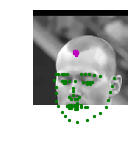

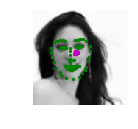

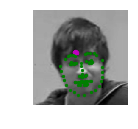

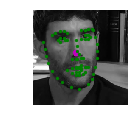

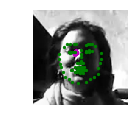

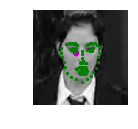

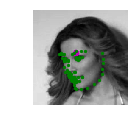

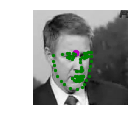

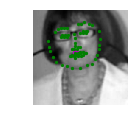

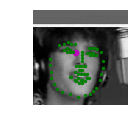

In [12]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [13]:
## We define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss()

optimizer = optim.Adam(params = net.parameters(), 
                       lr = 0.001)

## Training and Initial Observation

Now, we'll train on batched training data from `train_loader` for a number of epochs. 

In [14]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')


In [15]:
# train network
n_epochs = 10 

with active_session():
    train_net(n_epochs)

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.36614126414060594
Epoch: 1, Batch: 20, Avg. Loss: 0.27707782536745074
Epoch: 1, Batch: 30, Avg. Loss: 0.25725079476833346
Epoch: 1, Batch: 40, Avg. Loss: 0.21213197559118271
Epoch: 1, Batch: 50, Avg. Loss: 0.18426112160086633
Epoch: 1, Batch: 60, Avg. Loss: 0.35217435359954835
Epoch: 1, Batch: 70, Avg. Loss: 0.2185903564095497
Epoch: 1, Batch: 80, Avg. Loss: 0.20013558864593506
Epoch: 1, Batch: 90, Avg. Loss: 0.23070339858531952
Epoch: 1, Batch: 100, Avg. Loss: 0.18883244916796685
Epoch: 1, Batch: 110, Avg. Loss: 0.21097913458943368
Epoch: 1, Batch: 120, Avg. Loss: 0.18589882999658586
Epoch: 1, Batch: 130, Avg. Loss: 0.19366244748234748
Epoch: 1, Batch: 140, Avg. Loss: 0.1992850825190544
Epoch: 1, Batch: 150, Avg. Loss: 0.1993340954184532
Epoch: 1, Batch: 160, Avg. Loss: 0.1901138760149479
Epoch: 1, Batch: 170, Avg. Loss: 0.21862127035856246
Epoch: 1, Batch: 180, Avg. Loss: 0.20230050683021544
Epoch: 1, Batch: 190, Avg. Loss: 0.22389156967401505
Epoch:

Epoch: 5, Batch: 220, Avg. Loss: 0.1281038537621498
Epoch: 5, Batch: 230, Avg. Loss: 0.12083173990249634
Epoch: 5, Batch: 240, Avg. Loss: 0.12567828446626664
Epoch: 5, Batch: 250, Avg. Loss: 0.13965557813644408
Epoch: 5, Batch: 260, Avg. Loss: 0.10963269919157029
Epoch: 5, Batch: 270, Avg. Loss: 0.14325568526983262
Epoch: 5, Batch: 280, Avg. Loss: 0.12443221881985664
Epoch: 5, Batch: 290, Avg. Loss: 0.13065984696149827
Epoch: 5, Batch: 300, Avg. Loss: 0.12832883447408677
Epoch: 5, Batch: 310, Avg. Loss: 0.17257724851369857
Epoch: 5, Batch: 320, Avg. Loss: 0.13660492934286594
Epoch: 5, Batch: 330, Avg. Loss: 0.13014217987656593
Epoch: 5, Batch: 340, Avg. Loss: 0.1400654822587967
Epoch: 6, Batch: 10, Avg. Loss: 0.16894473806023597
Epoch: 6, Batch: 20, Avg. Loss: 0.12768019139766693
Epoch: 6, Batch: 30, Avg. Loss: 0.13512833863496782
Epoch: 6, Batch: 40, Avg. Loss: 0.12500116154551505
Epoch: 6, Batch: 50, Avg. Loss: 0.1390669360756874
Epoch: 6, Batch: 60, Avg. Loss: 0.31988423205912114
Ep

Epoch: 10, Batch: 80, Avg. Loss: 0.10994134843349457
Epoch: 10, Batch: 90, Avg. Loss: 0.12432402893900871
Epoch: 10, Batch: 100, Avg. Loss: 0.09130540117621422
Epoch: 10, Batch: 110, Avg. Loss: 0.10886573791503906
Epoch: 10, Batch: 120, Avg. Loss: 0.09455417953431607
Epoch: 10, Batch: 130, Avg. Loss: 0.09764442108571529
Epoch: 10, Batch: 140, Avg. Loss: 0.08368888646364211
Epoch: 10, Batch: 150, Avg. Loss: 0.1318464495241642
Epoch: 10, Batch: 160, Avg. Loss: 0.1061103206127882
Epoch: 10, Batch: 170, Avg. Loss: 0.07225794941186905
Epoch: 10, Batch: 180, Avg. Loss: 0.11226438768208027
Epoch: 10, Batch: 190, Avg. Loss: 0.1082095380872488
Epoch: 10, Batch: 200, Avg. Loss: 0.07693181931972504
Epoch: 10, Batch: 210, Avg. Loss: 0.11228389851748943
Epoch: 10, Batch: 220, Avg. Loss: 0.103753000497818
Epoch: 10, Batch: 230, Avg. Loss: 0.07953562326729298
Epoch: 10, Batch: 240, Avg. Loss: 0.08283205144107342
Epoch: 10, Batch: 250, Avg. Loss: 0.07518995106220246
Epoch: 10, Batch: 260, Avg. Loss: 0

## Test data

In [18]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


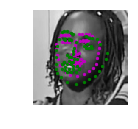

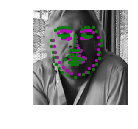

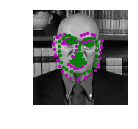

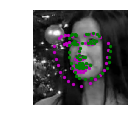

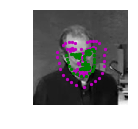

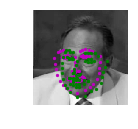

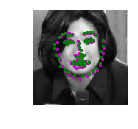

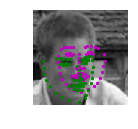

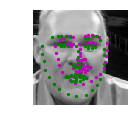

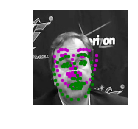

In [19]:
## We visualize your test output
visualize_output(test_images, test_outputs, gt_pts)


In [18]:
## Save the model
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'

# after training, we save the model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

In [17]:
# instantiate the Net
net = Net()
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'

# load the net parameters by name of a saved model
net.load_state_dict(torch.load(model_dir+model_name))

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, we can see how to extract a single filter (by index) from the first convolutional layer. The filter should appear as a grayscale grid.

[[ 0.23053014  0.2343096   0.08152024 -0.03638271]
 [ 0.1935004  -0.00352477  0.14326139 -0.21036199]
 [-0.0949916   0.04542163 -0.23351792  0.1143809 ]
 [-0.16767034 -0.16389897 -0.11915902  0.04235093]]
(4, 4)


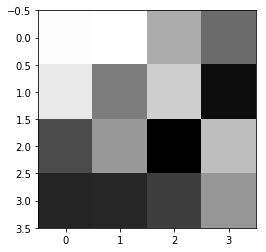

In [24]:
# Get the weights in the first conv layer, "conv1"
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

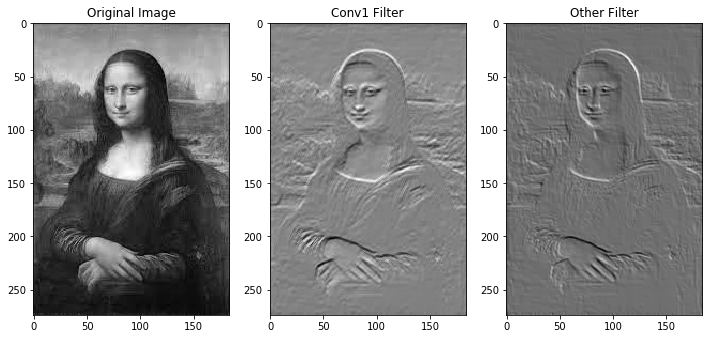

In [25]:
## We load in and display any image from the transformed test dataset

## Using cv's filter2D function,
## we apply a specific set of filter weights (like the one displayed above) to the test image
# Loading the image
import cv2

image = cv2.imread('./images/mona_lisa.jpg')

# convert image to grayscale and normalize
image_gray = cv2.cvtColor(image, 
                      cv2.COLOR_RGB2GRAY) / 255.0

# Convolutional Filter
filtered_Conv1 = cv2.filter2D(image_gray, 
                              -1, 
                              w[filter_index][0])

# Other filter example
filter_kernel = np.array([[ 0,  1,  1],
                          [-1,  0,  1],
                          [-1, -1,  0]])

filtered_img = cv2.filter2D(image_gray, 
                            -1, 
                            filter_kernel)

# Plot images
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, 
                                  nrows=1, 
                                  figsize=(10, 5))
ax1.imshow(image_gray, 
           cmap='gray')
ax2.imshow(filtered_Conv1, 
           cmap='gray')
ax3.imshow(filtered_img, 
           cmap='gray')

ax1.set_title('Original Image')
ax2.set_title('Conv1 Filter')
ax3.set_title('Other Filter')
plt.tight_layout();

---
## The next step

Now we've defined and trained the model (and saved the best model), we are ready to move on to the last notebook, which combines a face detector with the saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!